In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# !pip install livelossplot
from livelossplot import PlotLossesKeras

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/hongsukyi/Lectures/main/data/vds16.csv")

In [4]:
df.head(2)

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate
0,2017-04-02 0:00,43,34,9,0,50.3,1.90
1,2017-04-02 0:05,45,32,13,0,58.9,1.84


<Axes: >

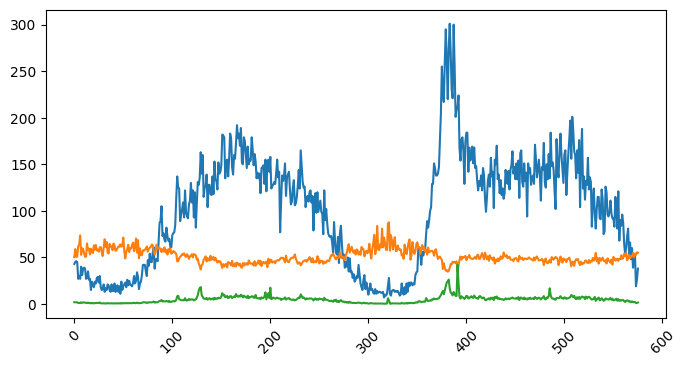

In [5]:
df['ToVol'][:576].plot(rot=45,figsize=(8,4))
df['Speed'][:576].plot(rot=45,figsize=(8,4))
df['OccRate'][:576].plot(rot=45,figsize=(8,4))

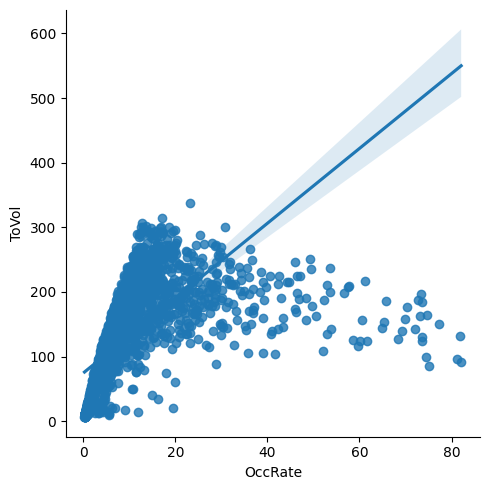

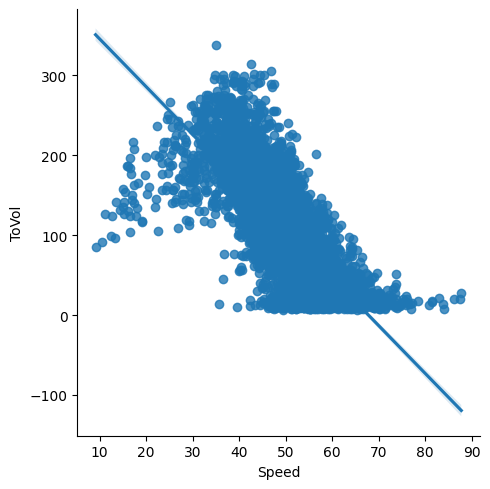

In [6]:
sns.lmplot(x="OccRate", y="ToVol", data=df)
sns.lmplot(x="Speed", y="ToVol", data=df)
#sns.lmplot(x="OccRate", y="Speed", data=df)

# 문제1: 점유률을 알고 있으면 MLP 모델로 교통량을 예측할 수 있을까?

In [7]:
문제2: ToVol = SmVol + MeVol + LaVol 일까요?

Object `일까요` not found.


features = ['ToVol','OccRate']
X = df[features]
y = df.iloc[:,4:5].values   # Speed

In [8]:
feature_1 = ['OccRate']
X1 = df[feature_1];
X1.shape

(8064, 1)

In [9]:
y1 = df[['ToVol']];
print("y shape:", y1.shape)
y1[-3:]

y shape: (8064, 1)


,ToVol
8061,32
8062,31
8063,39


In [10]:
print(y1.min(), y1.max() )

ToVol    6
dtype: int64 ToVol    338
dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
y1_scaled = scaler.fit_transform(y1)

In [12]:
print(X1_scaled[-3:])

[[-0.71324591]
 [-0.70731077]
 [-0.65686214]]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1_scaled, y1_scaled, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)

(5644, 1) (5644, 1)
(2420, 1) (2420, 1)


## Deep Neural Network

In [61]:
def model_dnn3():
    model = Sequential([
        Dense(5, activation='relu', input_shape=[X_train.shape[1]]),
        Dense(5, activation='relu'),
        Dense(1)
    ])    
    model.compile(optimizer='adam',loss= 'mse', metrics=['mae'])
    return model 

In [62]:
model = model_dnn3()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 5)                 10        
                                                                 
 dense_12 (Dense)            (None, 5)                 30        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


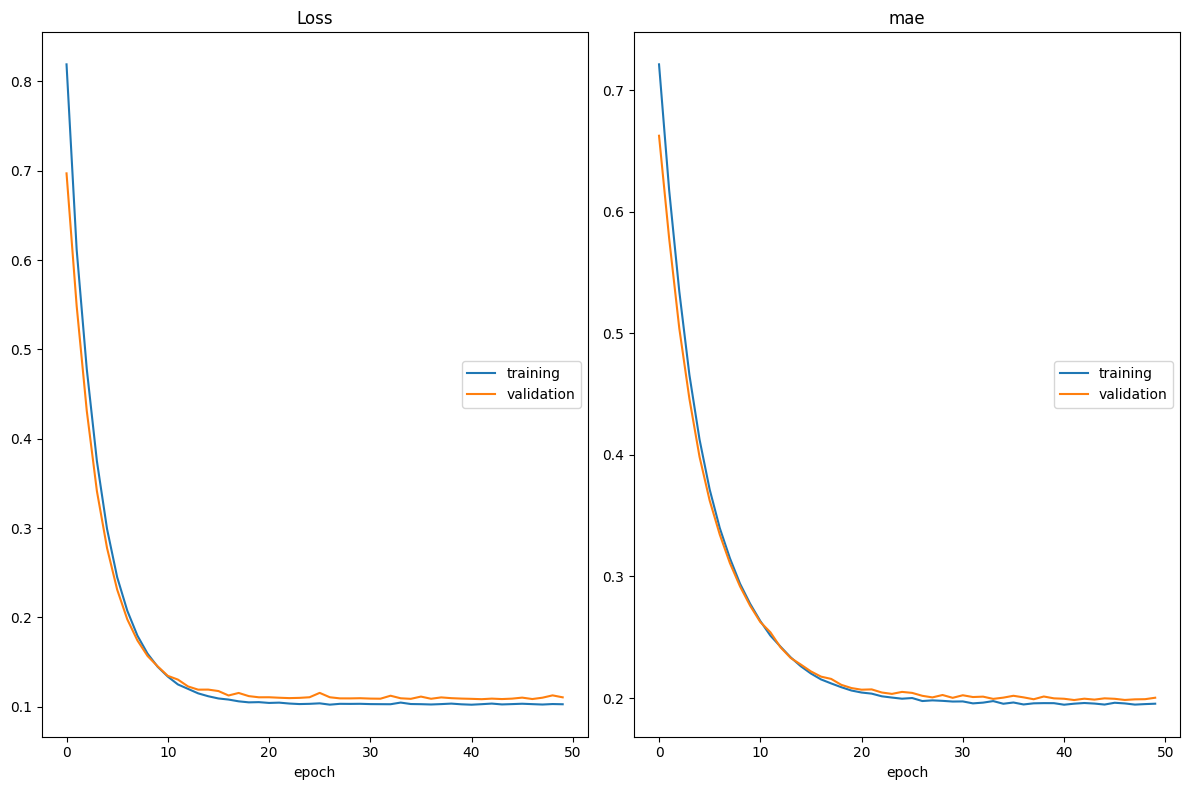

Loss
	training         	 (min:    0.102, max:    0.819, cur:    0.103)
	validation       	 (min:    0.109, max:    0.697, cur:    0.111)
mae
	training         	 (min:    0.195, max:    0.721, cur:    0.195)
	validation       	 (min:    0.198, max:    0.662, cur:    0.200)
142/142 [==============================] - 0s 3ms/step - loss: 0.1029 - mae: 0.1953 - val_loss: 0.1106 - val_mae: 0.2003


In [63]:
#history = model.fit(X_train,y_train, epochs=50, validation_split=0.2, verbose=0)
history = model.fit(X_train,y_train, epochs=50, validation_split=0.2, callbacks=[PlotLossesKeras()])

In [64]:
# 테스트 데이터 세트로 모델 평가: Loss 값 확인 
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print("MSE={:8.4f}, MAE={:8.4f}".format(mse,mae))

MSE=  0.1057, MAE=  0.1999


In [77]:
# history를 이용하여 훈련과정 가시화 
#history.history.keys()

In [78]:
#hist = pd.DataFrame(history.history)
#hist['epoch'] = history.epoch
#hist.tail(3)

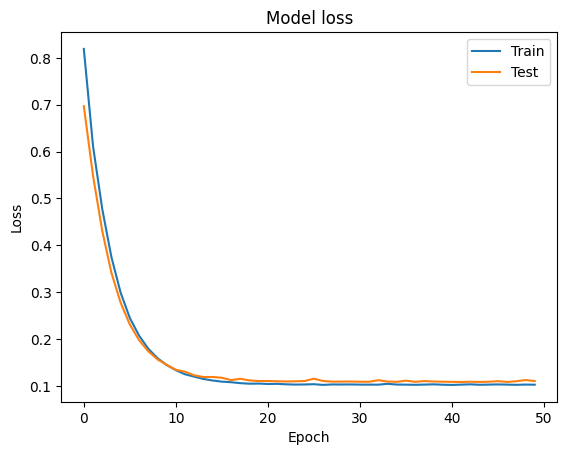

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')

In [68]:
y_pred = model.predict(X_test, verbose=0)
#print(y_pred.shape)

(2420, 1)


In [79]:
#print('(scaled) predictions : \n', y_pred[:2])
#print('\n (scaled) actural values :\n',y_test[:2])

In [81]:
y_inv_pred = scaler.inverse_transform(y_pred)
y_inv_test = scaler.inverse_transform(y_test)

In [82]:
#print('predictions : \n', y_inv_pred[:2])
#print('\nactural values :\n',y_inv_test[:2])

In [83]:
test_prediction = y_inv_pred.flatten()
test_real=y_inv_test.flatten()

Text(0, 0.5, 'Predictions [Speed]')

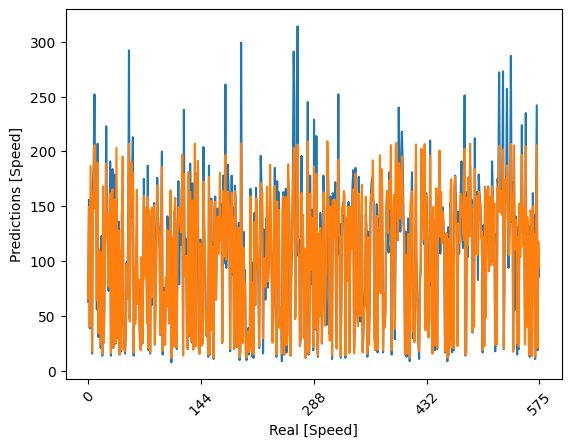

In [84]:
plt.plot(test_real[:576])
plt.plot(test_prediction[0:576])
plt.xticks(rotation=45)
plt.xticks([0, 144, 288, 432,575])
plt.xlabel('Real [Speed]')
plt.ylabel('Predictions [Speed]')

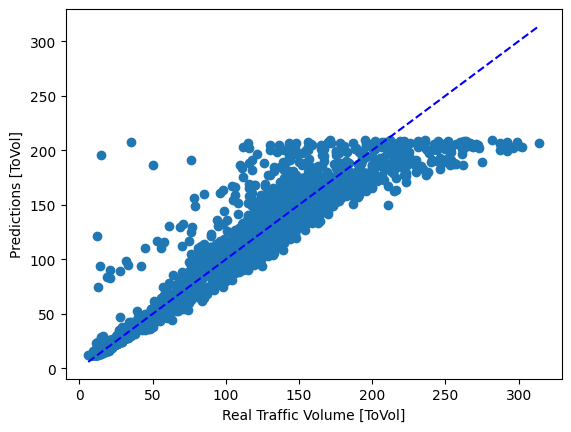

In [85]:
plt.scatter(test_real, test_prediction)
plt.xlabel('Real Traffic Volume [ToVol]')
plt.ylabel('Predictions [ToVol]')
plt.plot([test_real.min(),test_real.max()], [test_real.min(), test_real.max()],'b--')

Text(0, 0.5, 'Count')

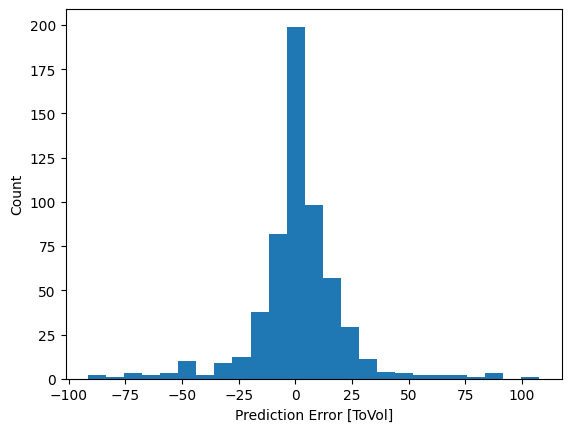

In [86]:
error = test_real[:576] - test_prediction[:576]
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [ToVol]")
plt.ylabel("Count")